In [1]:
import numpy as np
import math
from collections import Counter
from typing import NamedTuple
from pprint import pprint
import sklearn.metrics
import scipy.stats
import matplotlib.pyplot as plt


rng = np.random.default_rng()

Instructions: https://work.caltech.edu/homework/hw4.pdf

Answers: http://work.caltech.edu/homework/hw4_sol.pdf

# Generalization Error

# 1.

From the original VC Inequality:

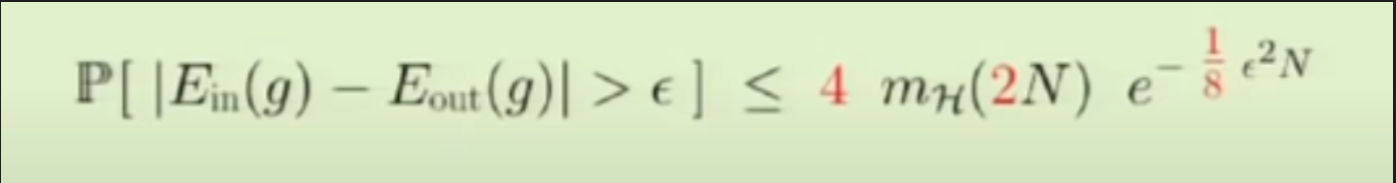

Since we want 95% confidence, δ = 0.05. 

ε = 0.05.

So we can write:

0.05 <= 4 m<sub>H</sub>(2N) e<sup>-1/8 0.05<sup>2</sup>N</sup>

0.05 <= 4 (2N)<sup>10</sup> e<sup>-1/8 0.05<sup>2</sup>N</sup>

Let's look at the answers numerically:

In [8]:
def δ_bound(N):
    return 4 * (2 * N)**10 * math.exp(-(1/8)* ((0.05)**2) * N)

print(f"Answer [a] gives δ of {δ_bound(400_000)}")
print(f"Answer [b] gives δ of {δ_bound(420_000)}")
print(f"Answer [c] gives δ of {δ_bound(440_000)}")
print(f"Answer [d] gives δ of {δ_bound(460_000)}")
print(f"Answer [e] gives δ of {δ_bound(480_000)}")

Answer [a] gives δ of 221896.07655417608
Answer [b] gives δ of 697.7536261452768
Answer [c] gives δ of 2.14484271996018
Answer [d] gives δ of 0.006458125661103743
Answer [e] gives δ of 1.9080951877323054e-05


My answer: <font color="green">d</font>

# 2.

In [39]:
d_vc = 50
δ = 0.05

def orig_vc_bound(N):
    return np.sqrt( (8/N) * np.log( (4 * (2*N)**d_vc ) / δ ) )

def rademacher_penalty_bound(N):
    return np.sqrt( (2 * np.log( 2 * N * N**d_vc )) / N ) + np.sqrt((2/N) * np.log(1/δ)) + (1 / N)


For the implicit bounds in [c] and [d], implicit means that ε appears on both sides of the bound.
    
I'm lazy so I just used 2025 AI to rewrite these as functions of ε only (in both cases it's a quadratic where we only need the + root):

[c] 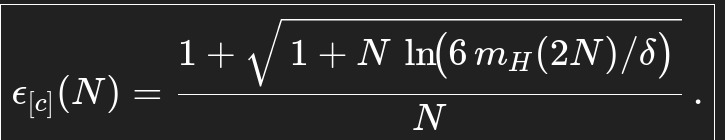

[d] 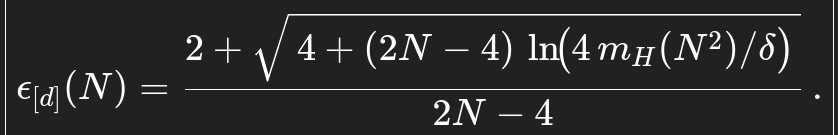

In [65]:
def parrondo_van_den_broek(N):
    return (1+np.sqrt( 1 + N * np.log( (6*(2*N)**d_vc) / δ ) )) / N

def devroye(N):
    return (2+np.sqrt( 4 + (2*N - 4) * np.log( (4 * ((N**2)**d_vc)) / δ ) ))/(2*N - 4)

10000.0


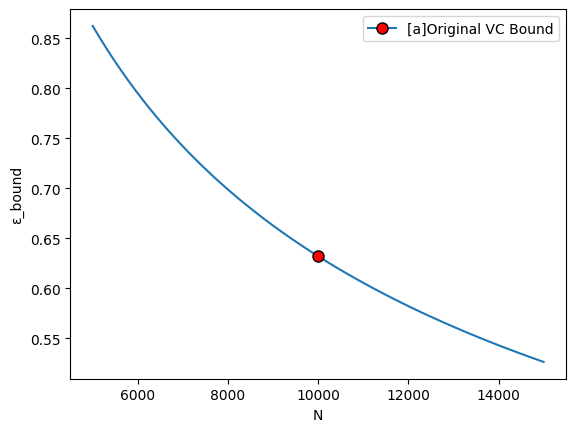

In [59]:
n = np.linspace(5_000, 15_000, num=101)
print(n[50])

y = orig_vc_bound(n)
plt.plot(n, y, '-', marker='o', label='[a]Original VC Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

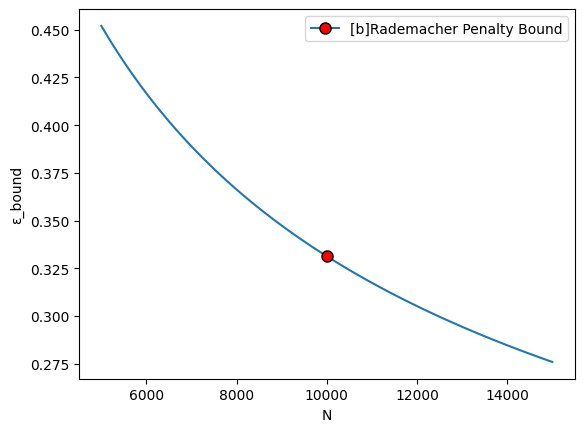

In [61]:
y = rademacher_penalty_bound(n)
plt.plot(n, y, '-', marker='o', label='[b]Rademacher Penalty Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

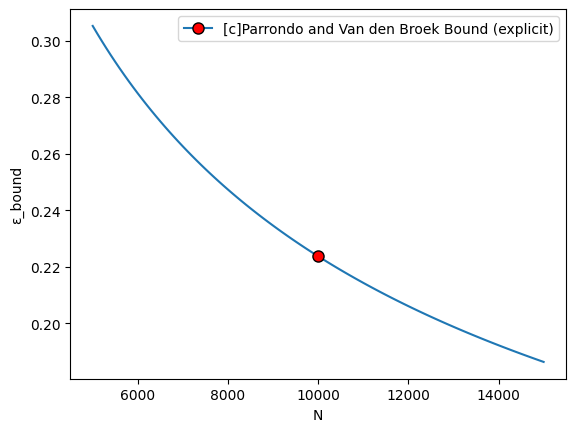

In [63]:
y = parrondo_van_den_broek(n)
plt.plot(n, y, '-', marker='o', label='[c]Parrondo and Van den Broek Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

/tmp/ipykernel_199963/1272172281.py:5: RuntimeWarning: overflow encountered in power
  return (2+np.sqrt( 4 + (2*N - 4) * np.log( (4 * ((N**2)**d_vc)) / δ ) ))/(2*N - 4)


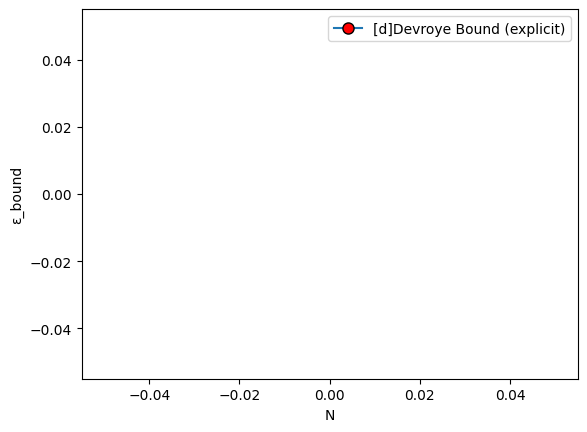

In [66]:
y = devroye(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

Devroye doesn't compute, could be that the exp involves very large numbers, or that I have a bug in the explicit derivation or function impl.

Let's see if I get a value directly for 10_000:

In [67]:
devroye(10_000)

OverflowError: int too large to convert to float

There's probably some tricks we can do to rewrite the exponential in the log in much friendlier terms. Oooor we could deploy cannons:

In [69]:
import mpmath as mp

mp.mp.dps = 80

def devroye_mp(N):
    N, dvc, delta = mp.mpf(N), mp.mpf(d_vc), mp.mpf(δ)
    big_log = mp.log( 4 * mp.power(N, 2*dvc) / delta )
    term    = mp.sqrt(4 + (2*N - 4)*big_log)
    return (2 + term) / (2*N - 4)

devroye_mp(10_000) 

mpf('0.21522804980824666970042078745691121256478323958264754493360089755521412433610118541')

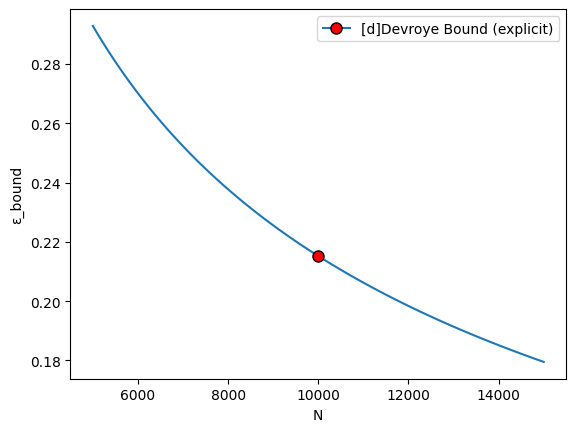

In [71]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

My answer: <font color="green">d</font>

# 3.

In [76]:
n = np.linspace(1, 10, num=10)
print(n[4])

5.0


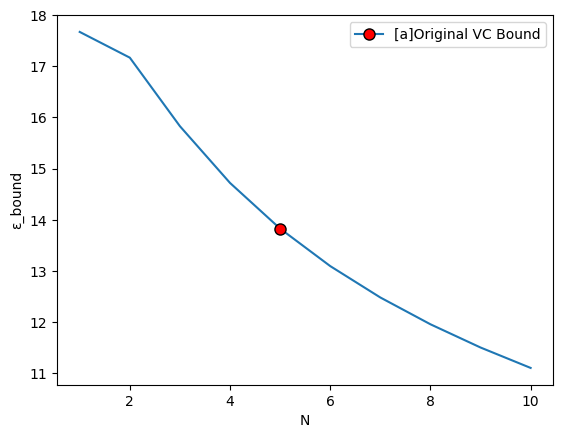

In [78]:
y = orig_vc_bound(n)
plt.plot(n, y, '-', marker='o', label='[a]Original VC Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

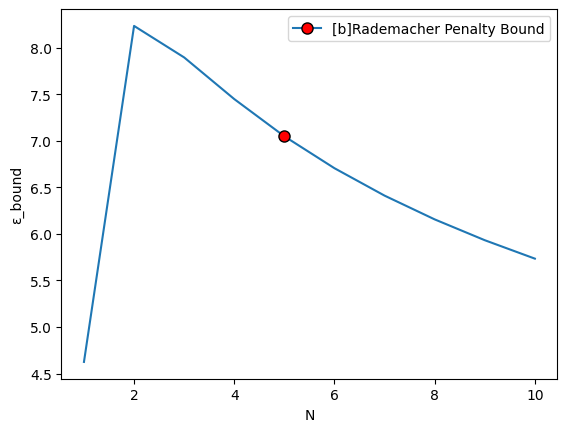

In [79]:
y = rademacher_penalty_bound(n)
plt.plot(n, y, '-', marker='o', label='[b]Rademacher Penalty Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

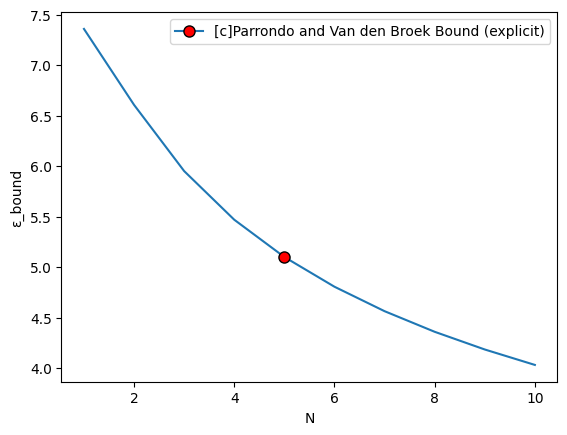

In [80]:
y = parrondo_van_den_broek(n)
plt.plot(n, y, '-', marker='o', label='[c]Parrondo and Van den Broek Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

In [81]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

ZeroDivisionError: 

Devroye seems to have problems below 3, so:

In [92]:
n = np.linspace(3, 10, num=8)
print(n[2])

5.0


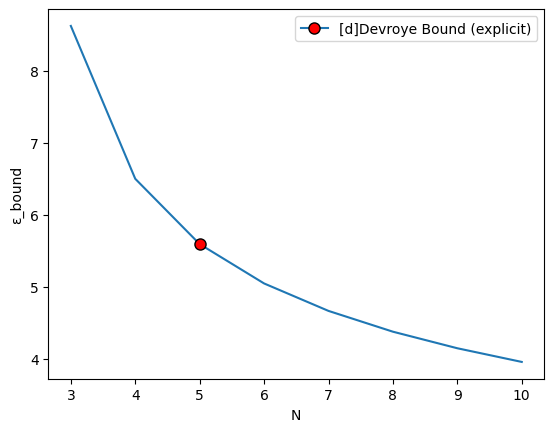

In [93]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[2])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

This seems slightly higher than Parrando and Van der Broek, let's double-check numerically:

In [94]:
print(f"Parrondo at 5 is: {parrondo_van_den_broek(5)}")
print(f"Devroye at 5 is: {devroye_mp(5)}")

Parrondo at 5 is: 5.101361981989992
Devroye at 5 is: 5.5931255431826696040299302245173807648523629470524088203288810606133511538739636


My answer: <font color="green">c</font>

# Bias and Variance

TODO after watching lecture 08

# VC Dimension

# 8.

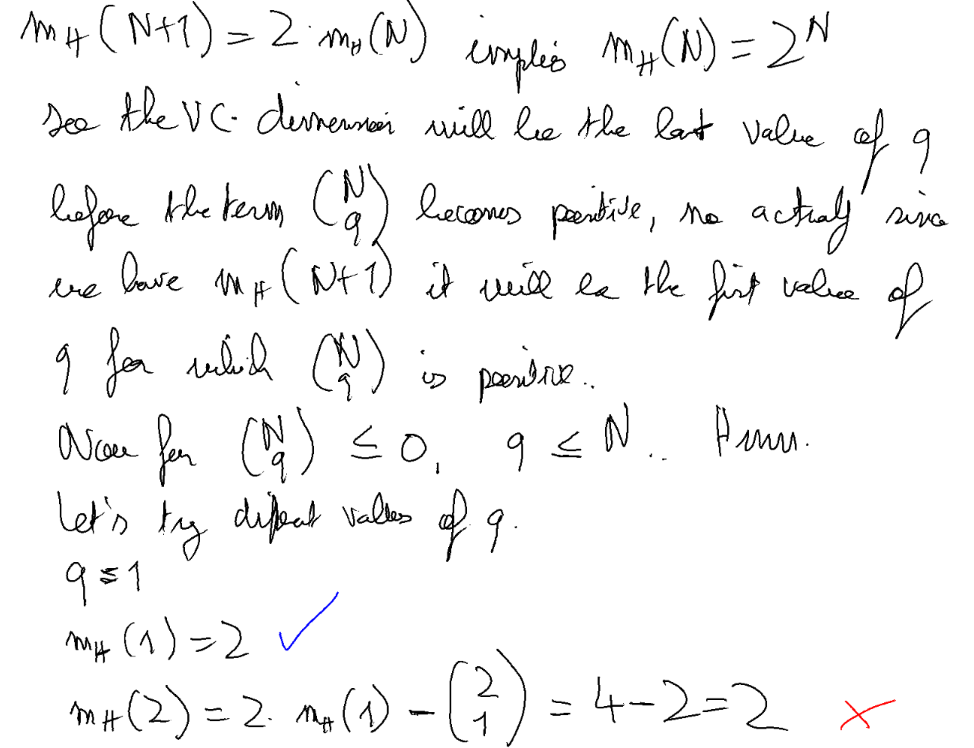

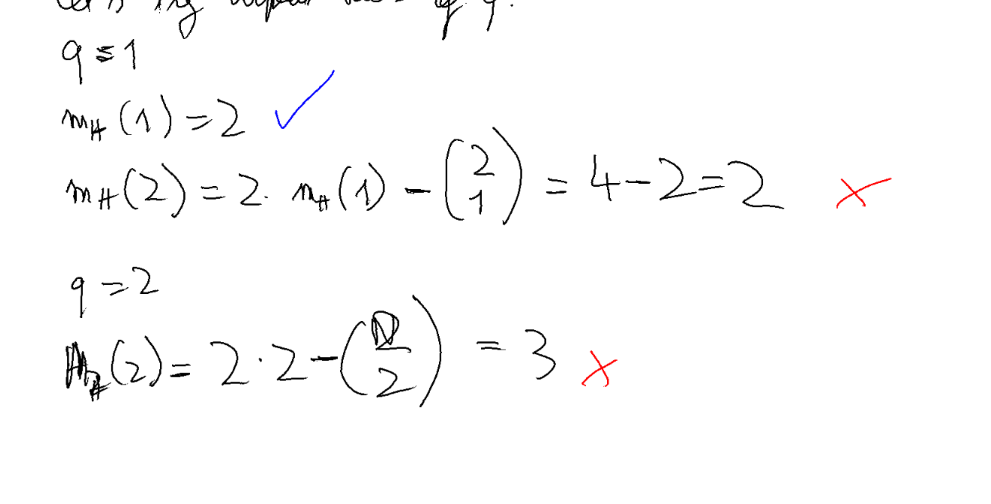

So the VC dimension appears to be q for q=1, but q-1 for q=2, so the answer has to be:

<font color="red">[e]</font>

Ah I messed up the N choose q term -.-, so the deduction above was correct after all:

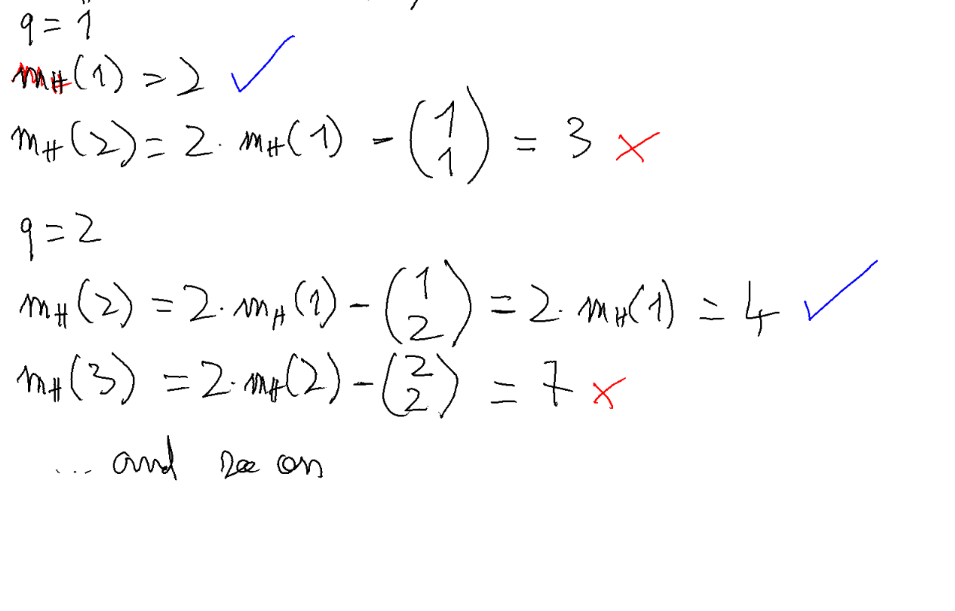

So <font color="green">[c]</font> is indeed correct.

# 9.

Intersection means whatever we pick from H<sub>k must be common to all hypothesis sets, so the bound should be relatively tight.

So the lower bound needs to be the lower bound of at least one of the hypotheses, meaning we can exclude [a] - [c] right away and focus on [d] and [e].

Now taking the max as the higher bound seems excessive, but better than summing them up, so intuitive without checking/proving I would go for


<font color="red">[d]</font>                                                                 

                                                                                                                                              

Thinking again, there could be no intersection at all between the Hypothesis sets, so the intersection could an empty set, so my lower bound deduction above was wrong and we instead need to focus on 0 as the lower bound, i.e. [a] - [c].

The max and summation both seem to be too tight of a bound.

But is the minimum correct? Since we're looking at intersection, whatever hypothesis set we pick would not be able to shatter more points than the weakest of the sets, so min should indeed be the tightest, correct upper bound.

<font color="green">[b]</font>

# 10.

The union of the Hypothesis sets cannot be empty (save if one of the hyposthesis sets H<sub>k is empty, in which case it would factor into the minimum.

So is the lower bound the min or max? Since any hypothesis could be in any of the hypothesis sets, we could end up picking from the hypothesis set with the worst d<sub>VC</sub>, so the lower bound needs to be the max, leaving `[d]` and `[e]` as possible answers.

In [ ]:
Deciding between these seems complex, 